# Описание данных 🥑 

Датасет продаж авокадо (сорта Хасс) в США в 2015 - 2018 г. 
Значения колонок датасета:
1. Date - дата продажи
2. AveragePrice - средняя цена продажи одного авокадо
3. Total Volume - общее число проданных авокадо
4. 4046 - Число проданных авокадо с продуктовым кодом: 4046, Small Hass Size 60 & smaller (маленький размер, 60 и меньше)
5. 4225 - Число проданных авокадо с продуктовым кодом: 4225, Large Hass Size 40 & 48 (большой размер, 40 и 48)
6. 4770 - Число проданных авокадо с продуктовым кодом: 4770, Extra Large Hass Size 36 & larger (экстра - большой размер, 36 и больше)
7. Total Bags - Общее число проданных пакетов с авокадо (авокадо из пакетов включены в колонку 3)
8. Small Bags - Число проданных маленьких пакетов с авокадо
9. Large Bags - Число проданных больших пакетов с авокадо
10. XLarge Bags - Число проданных экстра - больших пакетов с авокадо
11. type - Технология производства проданных авокадо (conventional - обычная, organic - органическая, с более высокими экологическими стандартами)
12. year - Год продажи
13. Region - город продажи

Датасет взят с kaggle, ссылка на датасет: https://www.kaggle.com/neuromusic/avocado-prices

Расшифровки продуктовых кодов взяты с http://indexfresh.com/retail-foodservice/brands/packaging/plus/

<img width = '300px' src= https://img.freepik.com/free-vector/cartoon-avocado-and-horse_185029-571.jpg>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tools
from plotly.subplots import make_subplots
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data exploration

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

data1 = pd.read_csv('avocado.csv')

In [3]:
data1.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.7+ MB


In [5]:
data1.shape

(18249, 14)

In [6]:
data1.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [7]:
data1.describe(include=['object'])

Date          type   region
count        18249         18249    18249
unique         169             2       54
top     2018-01-28  conventional  StLouis
freq           108          9126      338

In [8]:
data1.isnull().values.sum() #total missing values

0

In [9]:
#Checking Duplicate
print('Dupplicate entries: {}'.format(data1.duplicated().sum()))
# data.drop_duplicates(inplace = True)

Dupplicate entries: 0


In [10]:
obj = data1.dtypes[data1.dtypes == "object"].index.tolist()
print(obj)

['Date', 'type', 'region']


In [11]:
#Nunique Columns
def nunique_counts(data):
    for i in data.columns:
        count = data[i].nunique()
        print(i, ": ", count)
    
nunique_counts(data1)

Unnamed: 0 :  53
Date :  169
AveragePrice :  259
Total Volume :  18237
4046 :  17702
4225 :  18103
4770 :  12071
Total Bags :  18097
Small Bags :  17321
Large Bags :  15082
XLarge Bags :  5588
type :  2
year :  4
region :  54


In [12]:
data1['Date'] = pd.to_datetime(data1['Date'])

In [13]:
data1.rename(columns={'year':'Year'}, inplace=True) #renaming column

In [14]:
data1.rename(columns={'4046':'PLU 4046'}, inplace=True)
data1.rename(columns={'4225':'PLU 4225'}, inplace=True)
data1.rename(columns={'4770':'PLU 4770'}, inplace=True)

In [15]:
data1['Year'] = data1['Date'].dt.year
data1['Month'] = data1['Date'].dt.month
data1['Day'] = data1['Date'].dt.day

In [16]:
data1.head()

Unnamed: 0       Date  AveragePrice  Total Volume  PLU 4046   PLU 4225  \
0           0 2015-12-27          1.33      64236.62   1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98    674.28   44638.81   
2           2 2015-12-13          0.93     118220.22    794.70  109149.67   
3           3 2015-12-06          1.08      78992.15   1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60    941.48   43838.39   

   PLU 4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0     48.16     8696.87     8603.62       93.25          0.0  conventional   
1     58.33     9505.56     9408.07       97.49          0.0  conventional   
2    130.50     8145.35     8042.21      103.14          0.0  conventional   
3     72.58     5811.16     5677.40      133.76          0.0  conventional   
4     75.78     6183.95     5986.26      197.69          0.0  conventional   

   Year  region  Month  Day  
0  2015  Albany     12   27  
1  2015  Albany     12   20  
2  2015  Albany     12   13  
3  2015  Albany     12    6  
4  2015  Albany     11   29

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   PLU 4046      18249 non-null  float64       
 5   PLU 4225      18249 non-null  float64       
 6   PLU 4770      18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  Year          18249 non-null  int64         
 13  region        18249 non-null  object        
 14  Month         18249 non-null  int64         
 15  Day           18249 non-null  int64 

In [18]:
data1['Year'].min(), data1['Year'].max()

(2015, 2018)

In [19]:
data1.drop('Unnamed: 0', axis=1, inplace=True)

In [20]:
data1['Total Volume'].sum() == data1['PLU 4046'].sum() + data1['PLU 4225'].sum() + data1['PLU 4770'].sum()

False

In [21]:
data1['Total Volume'].sum(), data1['PLU 4046'].sum() + data1['PLU 4225'].sum() + data1['PLU 4770'].sum()

(15523402593.400002, 11150188799.32)

In [22]:
data1['Total Revenue'] = data1['AveragePrice'] * data1['Total Volume']
data1['Total Revenue PLU 4046'] = data1['AveragePrice'] * data1['PLU 4046']
data1['Total Revenue PLU 4225'] = data1['AveragePrice'] * data1['PLU 4225']
data1['Total Revenue PLU 4770'] = data1['AveragePrice'] * data1['PLU 4770']
data1['Total Revenue Small Bags'] = data1['AveragePrice'] * data1['Small Bags']
data1['Total Revenue Large Bags'] = data1['AveragePrice'] * data1['Large Bags']
data1['Total Revenue XLarge Bags'] = data1['AveragePrice'] * data1['XLarge Bags']

In [23]:
data1.head()

Date  AveragePrice  Total Volume  PLU 4046   PLU 4225  PLU 4770  \
0 2015-12-27          1.33      64236.62   1036.74   54454.85     48.16   
1 2015-12-20          1.35      54876.98    674.28   44638.81     58.33   
2 2015-12-13          0.93     118220.22    794.70  109149.67    130.50   
3 2015-12-06          1.08      78992.15   1132.00   71976.41     72.58   
4 2015-11-29          1.28      51039.60    941.48   43838.39     75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  Year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  Total Revenue  Total Revenue PLU 4046  \
0  Albany     12   27     85434.7046               1378.8642   
1  Albany     12   20     74083.9230                910.2780   
2  Albany     12   13    109944.8046                739.0710   
3  Albany     12    6     85311.5220               1222.5600   
4  Albany     11   29     65330.6880               1205.0944   

   Total Revenue PLU 4225  Total Revenue PLU 4770  Total Revenue Small Bags  \
0              72424.9505                 64.0528                11442.8146   
1              60262.3935                 78.7455                12700.8945   
2             101509.1931                121.3650                 7479.2553   
3              77734.5228                 78.3864                 6131.5920   
4              56113.1392                 96.9984                 7662.4128   

   Total Revenue Large Bags  Total Revenue XLarge Bags  
0                  124.0225                        0.0  
1                  131.6115                        0.0  
2                   95.9202                        0.0  
3                  144.4608                        0.0  
4                  253.0432                        0.0

- После проверки отсутствующих значений и дубликатов можно сделать вывод, что данные готовы
- Столбец даты преобразуем в формат datetime, чтобы позже можно было использовать их для анализа
- Также год, месяц и дату записываем отдельно в разных столбцах
- Проверяю являются ли общее число проданных авокадо суммой проданных авокадо с продуктовым кодом PLU 4046, 4225 и 4770, а это не то же самое
- Далее получаю общий доход от общего объема продаж, от объема продаж по видам авокадо и от объема продаж по размеру  пакетов с авокадо

# Volume by Avocado Type

In [24]:
custom_aggregation = {}
custom_aggregation["Total Volume"] = "sum"
custom_aggregation["PLU 4046"] = "sum"
custom_aggregation["PLU 4225"] = "sum"
custom_aggregation["PLU 4770"] = "sum"

data2 = data1.groupby("type").agg(custom_aggregation)
data2['Avocado Type'] = data2.index

labels = data2['Avocado Type'].tolist()
values = data2['Total Volume'].tolist()
values1 = data2['PLU 4046'].tolist()
values2 = data2['PLU 4225'].tolist()
values3 = data2['PLU 4770'].tolist()

In [25]:
data2

Total Volume      PLU 4046      PLU 4225      PLU 4770  \
type                                                                   
conventional  1.508722e+10  5.280410e+09  5.245673e+09  4.143733e+08   
organic       4.361817e+08  6.670082e+07  1.406024e+08  2.429041e+06   

              Avocado Type  
type                        
conventional  conventional  
organic            organic

In [26]:
data3 = data2.sum()

In [27]:
data3['Other types'] = data1['Total Volume'].sum() - (data1['PLU 4046'].sum() + data1['PLU 4225'].sum() + data1['PLU 4770'].sum())

In [28]:
data3 = data3.drop('Avocado Type')

In [29]:
data3

Total Volume    15523402593.399977
PLU 4046         5347110739.259997
PLU 4225         5386275717.929977
PLU 4770          416802342.130002
Other types      4373213794.080002
dtype: object

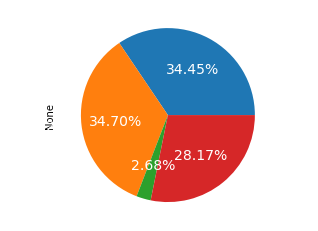

In [30]:
data3.iloc[1:5].plot(kind='pie',subplots=True, autopct = "%.2f%%", textprops={'color':"w"},fontsize=14)
plt.show()

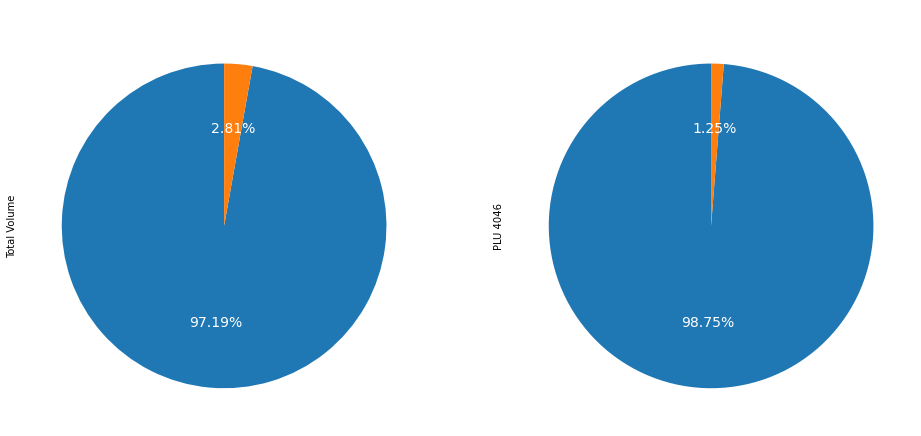

In [31]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
data2['Total Volume'].plot(kind='pie', ax =ax1, autopct = "%.2f%%", textprops={'color':"w"},
 startangle=90, shadow=False, legend = False, fontsize=14)
plt.title('Total Volume', color = 'w')

ax2 = plt.subplot(122)
data2['PLU 4046'].plot(kind='pie', ax =ax2, autopct = "%.2f%%", textprops={'color':"w"},
                        startangle=90, shadow=False, legend = False, fontsize=14)
plt.title('PLU 4046', color = 'w')

plt.show()

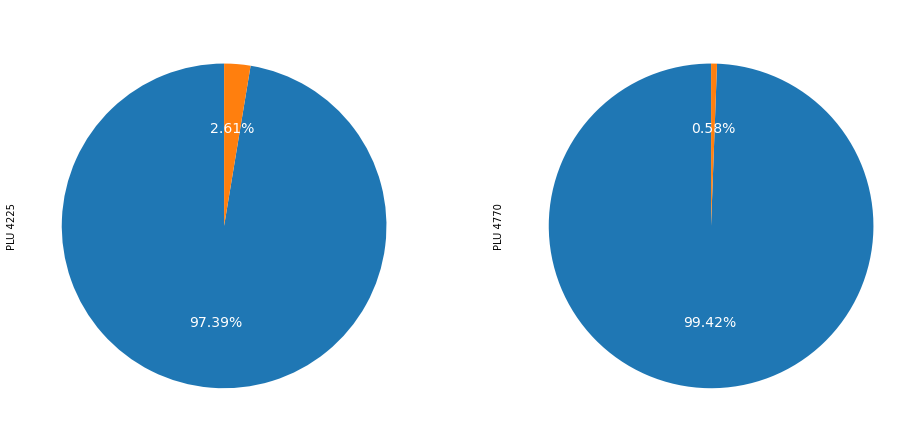

In [32]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(121, aspect='equal')
data2['PLU 4225'].plot(kind='pie', ax =ax1, autopct = "%.2f%%", textprops={'color':"w"},
 startangle=90, shadow=False, legend = False, fontsize=14)
plt.title('PLU 4225', color = 'w')

ax2 = plt.subplot(122)
data2['PLU 4770'].plot(kind='pie', ax =ax2, autopct = "%.2f%%", textprops={'color':"w"},
                        startangle=90, shadow=False, legend = False, fontsize=14)
plt.title('PLU 4770', color = 'w')

plt.show()

По общему объему продаж (весь и объем по типу авокадо) видно, что большая часть проданного авокадо - это обычные авокадо. Между тем, для органических авокадо объем продаж очень маленький: около 1-2% от общего числа проданных авокадо.

# Total Revenue by Avocado Type

In [33]:
custom_aggregation = {}
custom_aggregation["Total Revenue"] = "sum"
data2 = data1.groupby("type").agg(custom_aggregation)
data2['Avocado Type'] = data2.index

labels = data2['Avocado Type'].tolist()
values = data2['Total Revenue'].tolist()

In [34]:
data2

Total Revenue  Avocado Type
type                                     
conventional   1.625352e+10  conventional
organic        6.806085e+08       organic

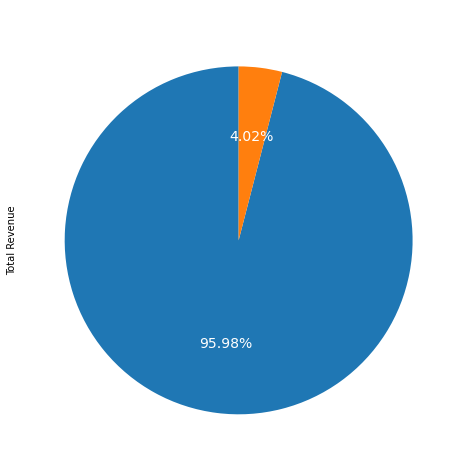

In [35]:
plt.figure(figsize=(16,8))
data2['Total Revenue'].plot(kind='pie', autopct = "%.2f%%", textprops={'color':"w"},
 startangle=90, shadow=False, legend = False, fontsize=14)
plt.title('Total Revenue', color = 'w')

plt.show()

Соответственно, обычные авокадо приносят почти весь доход в сравнении с органическими авокадо.

# Type & Total Volume on Each Bags

In [36]:
custom_aggregation = {}
custom_aggregation["Small Bags"] = "sum"
custom_aggregation["Large Bags"] = "sum"
custom_aggregation["XLarge Bags"] = "sum"

data2 = data1.groupby("type").agg(custom_aggregation)
data2['Avocado Type'] = data2.index

In [37]:
data2

Small Bags    Large Bags  XLarge Bags  Avocado Type
type                                                               
conventional  3.164183e+09  9.259030e+08  56678255.60  conventional
organic       1.606877e+08  6.571281e+07     10921.73       organic

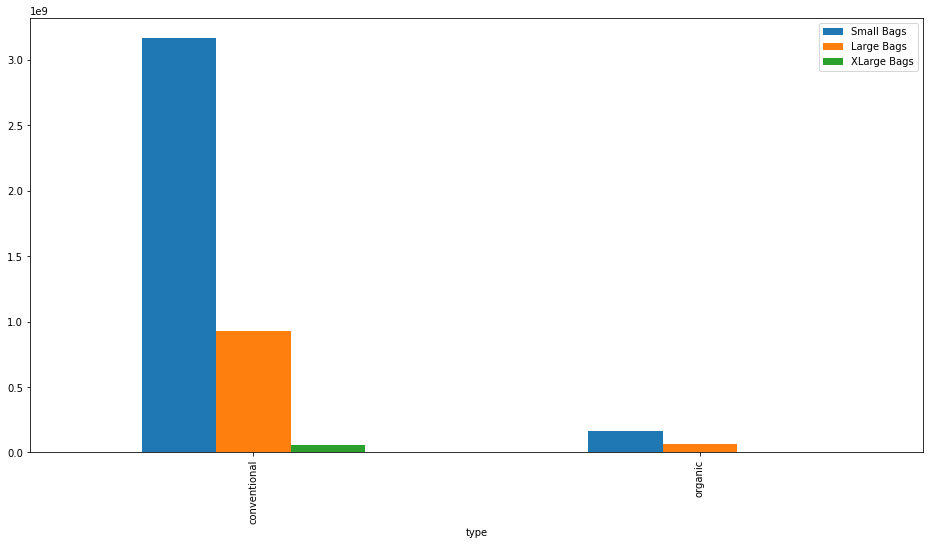

In [38]:
data2.iloc[:, :3].plot(kind='bar', figsize=(16,8))
plt.show()

Из этого графика видно, что большая часть авокадо (как обычного, так и органического) покупается в небольших пакетах.

# Total Volume by Region

In [39]:
custom_aggregation = {}
custom_aggregation["Total Volume"] = "sum"
data2 = data1.groupby("region").agg(custom_aggregation)
data2['Region'] = data2.index

In [40]:
data2=data2.drop('TotalUS')

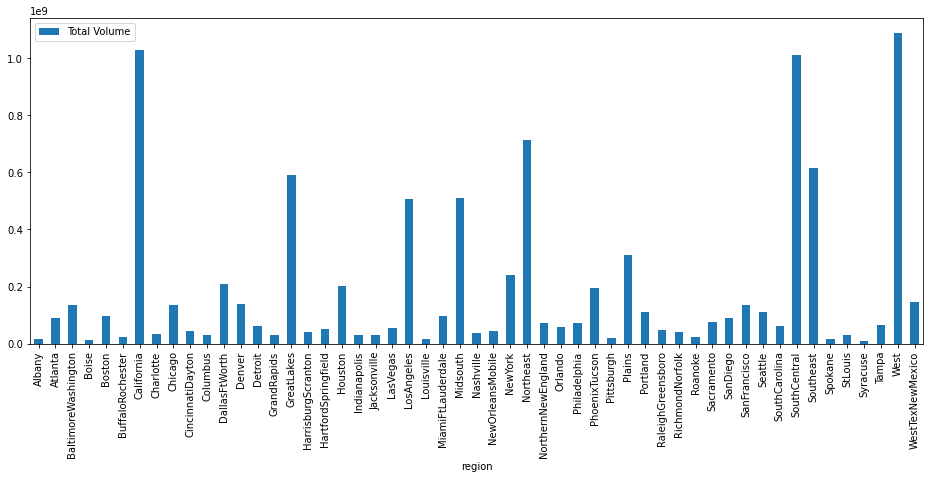

In [41]:
data2.plot(kind='bar', figsize=(16,6))
plt.show()

Больше всего продано авокадо в Западной, Южной и Центральной Калифорнии.

# Total Revenue by Region

In [42]:
custom_aggregation = {}
custom_aggregation["Total Revenue"] = "sum"
data2 = data1.groupby("region").agg(custom_aggregation)
data2['Region'] = data2.index
data2=data2.drop('TotalUS')

In [43]:
data2.head(2)

Total Revenue   Region
region                         
Albany    2.176672e+07   Albany
Atlanta   9.379337e+07  Atlanta

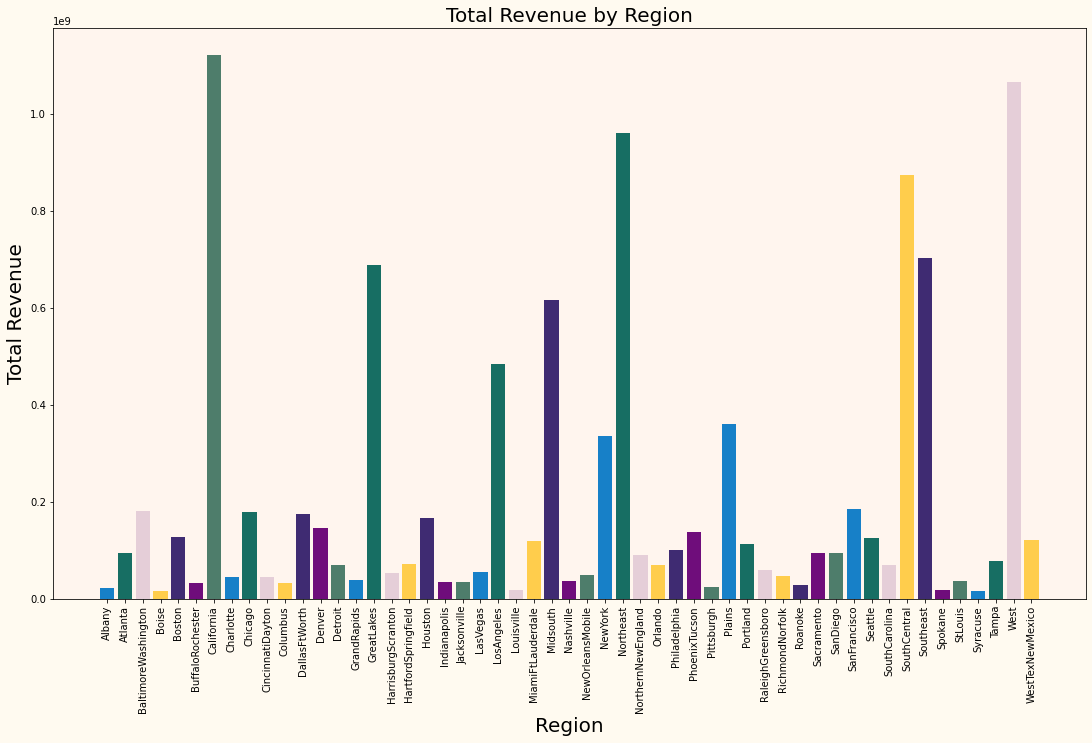

In [44]:
x = data2['Region']
y1 = data2['Total Revenue']

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

color_rectangle = np.random.rand(7, 3)    # RGB
ax.bar(x, y1, color = color_rectangle)

plt.title('Total Revenue by Region', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Total Revenue', fontsize=20)
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

# Average Price by Region

In [45]:
custom_aggregation = {}
custom_aggregation["AveragePrice"] = "mean"
data2 = data1.groupby("region").agg(custom_aggregation)
data2['Region'] = data2.index

In [46]:
data2.head(2)

AveragePrice   Region
region                        
Albany       1.561036   Albany
Atlanta      1.337959  Atlanta

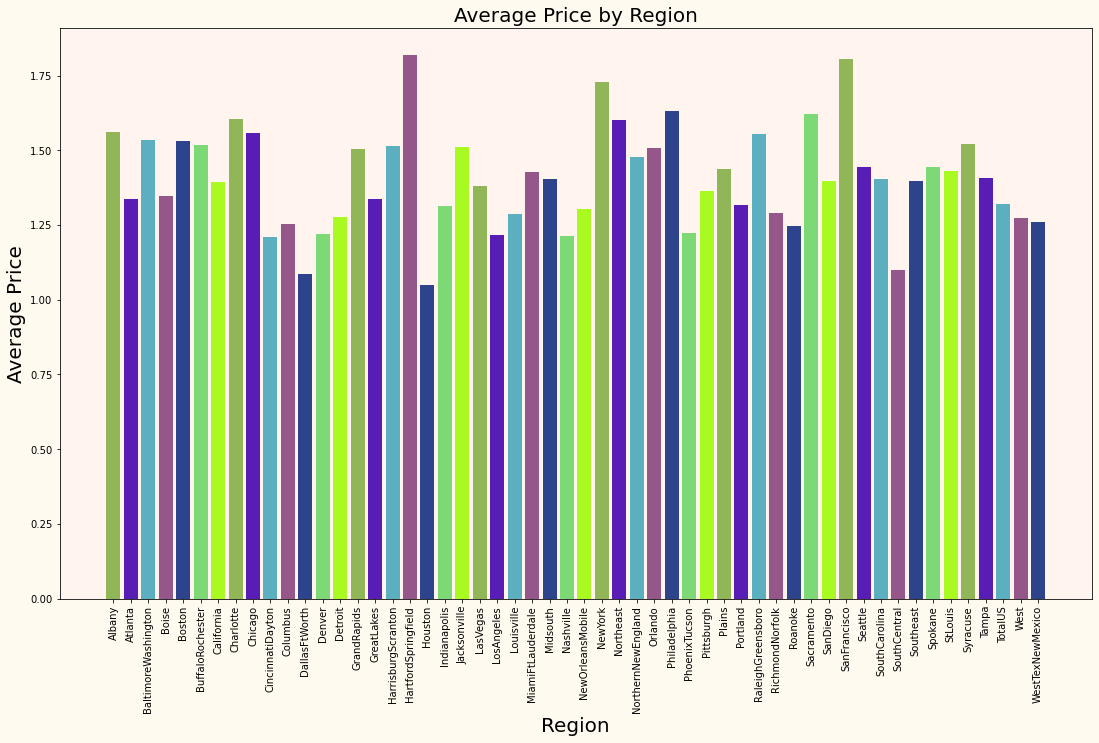

In [47]:
x = data2['Region']
y1 = data2['AveragePrice']

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

color_rectangle = np.random.rand(7, 3)    # RGB
ax.bar(x, y1, color = color_rectangle)

plt.title('Average Price by Region', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Average Price', fontsize=20)
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

Регионы с высокой средней ценой на авокадо: Хартфорд Спрингфилд, Сан-Франциско и Калифорния. 
</br> Регионы с самой низкой ценой на авокадо: Южный Центр, Хьюстон и Даллас

Анализ данных показал, что лучше всего продаются авокадо типа PLU 4225, а не PLU 4046. Для PLU 4770 очень мало продаж

# Average Price by date

In [48]:
df = pd.read_csv('avocado.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_values(by=['Date'])

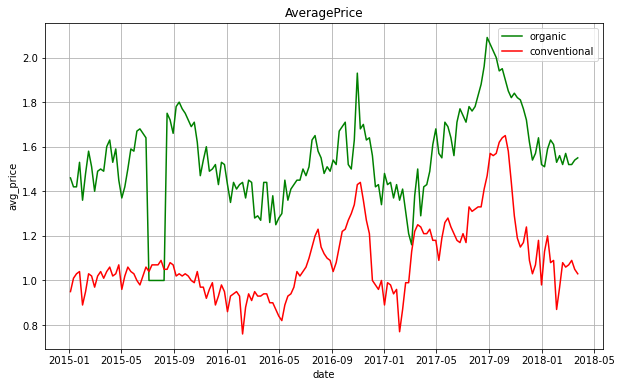

In [49]:
total_org = df[(df.type=='organic')&(df.region=='TotalUS')]
total_conv = df[(df.type=='conventional')&(df.region=='TotalUS')]
plt.figure(figsize = (10,6))
plt.title('AveragePrice')
plt.xlabel('date')
plt.ylabel('avg_price')
plt.plot(total_org.index, total_org.AveragePrice, color = 'green', label = 'organic')
plt.plot(total_conv.index, total_conv.AveragePrice, color = 'red', label = 'conventional')
plt.grid()
plt.legend()
plt.show()

# Total Volume by date

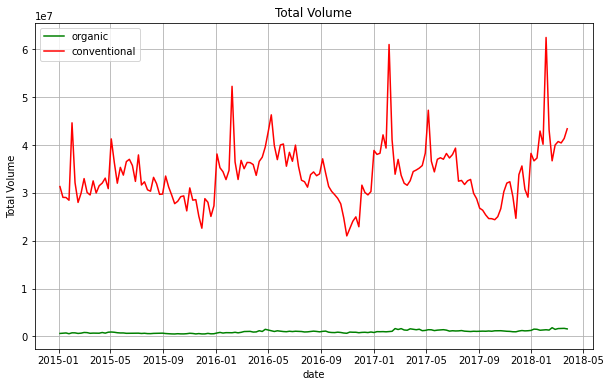

In [50]:
plt.figure(figsize = (10,6))
plt.title('Total Volume')
plt.xlabel('date')
plt.ylabel('Total Volume')
plt.plot(total_org.index, total_org['Total Volume'], color = 'green', label = 'organic')
plt.plot(total_conv.index, total_conv['Total Volume'], color = 'red', label = 'conventional')
plt.grid()
plt.legend()
plt.show()

# Average Price and Total Volume by date for each city

In [51]:
cities1 = df['region'].unique()
cities = pd.DataFrame({'city' : cities1})

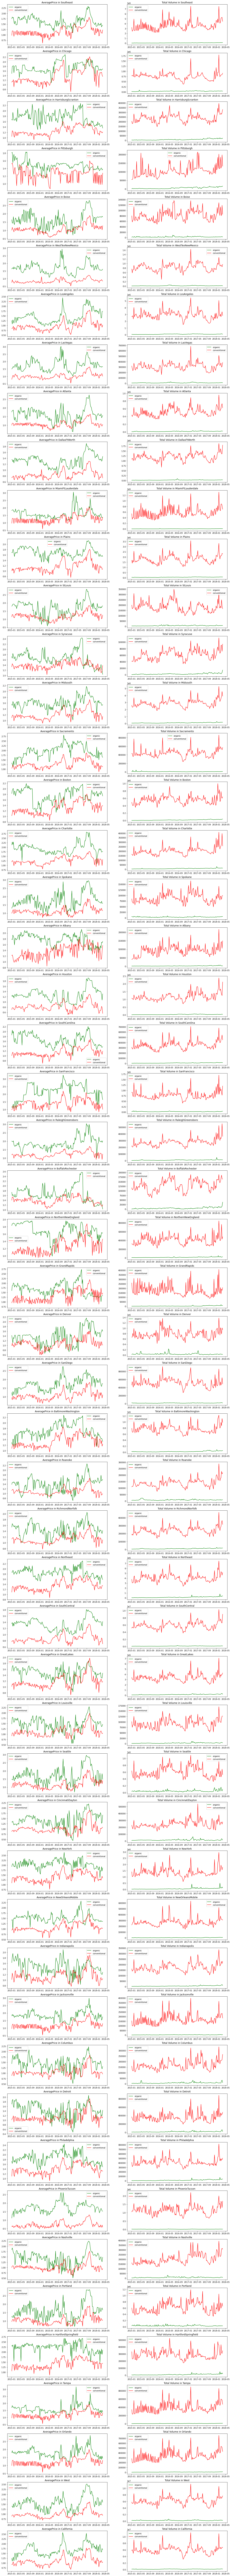

In [52]:
fig, axes = plt.subplots(53, 2)
fig.set_figheight(240)
fig.set_figwidth(20)
ind = 0
for elem in cities1:
    if elem!='TotalUS':
        total_org = df[(df.type=='organic')&(df.region==elem)]
        total_conv = df[(df.type=='conventional')&(df.region==elem)]
        axes[ind,0].plot(total_org.index, total_org.AveragePrice, color = 'green', label = 'organic')
        axes[ind,0].plot(total_conv.index, total_conv.AveragePrice, color = 'red', label = 'conventional')
        axes[ind,1].plot(total_org.index, total_org['Total Volume'], color = 'green', label = 'organic')
        axes[ind,1].plot(total_conv.index, total_conv['Total Volume'], color = 'red', label = 'conventional')
        axes[ind,0].set_title('AveragePrice in {}'.format(elem))
        axes[ind,1].set_title('Total Volume in {}'.format(elem))
        axes[ind,0].legend()
        axes[ind,1].legend()
        ind = ind +1

В ходе визуального анализа были выявлены следующие инсайды:
- Объем продаж обычных авокадо в большинстве городов и штатов резко возрастает в конце зимы (пики в 2016-02, 2017-02, 2018-02), напр. в Калифорнии, Сакраменто, Сан-Франциско и др.
- Объем продаж органических авокадо практически не претерпевал изменений в большинстве городов (за исключением Seattle, Syracuse, NewYork, Denver, Portland)
- Цены на органические авокадо стабильно превышают цены на обычные
- Резкое падение цен на органические авокадо в период с 2015-07 - 2015-08 по стране в целом, причем цены падают ниже среднего уровня цен на обычные авокадо. 
- Также, на уровне штатов наблюдается падение цен на авокадо в период с 2017-01 - 2017 -05 (например, Ричмонд - Норфолк, Роанок, Портланд).

# Проверка статистических гипотез

In [13]:
import seaborn as sns

In [14]:
df.head()

AveragePrice  Total Volume     4046      4225     4770  \
Date                                                                 
2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
2015-01-04          1.68       2896.72   161.68    206.96     0.00   
2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date                                                                        
2015-01-04    13598.46    13061.10      537.36          0.0       organic   
2015-01-04      905.55      905.55        0.00          0.0       organic   
2015-01-04     2528.08     2528.08        0.00          0.0       organic   
2015-01-04    14925.18    11264.80     3660.38          0.0  conventional   
2015-01-04      374.35      186.67      187.68          0.0       organic   

                        region  
Date                            
2015-01-04           Southeast  
2015-01-04             Chicago  
2015-01-04  HarrisburgScranton  
2015-01-04          Pittsburgh  
2015-01-04               Boise

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

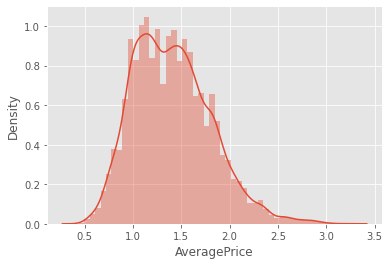

In [21]:
sns.distplot(df['AveragePrice'])

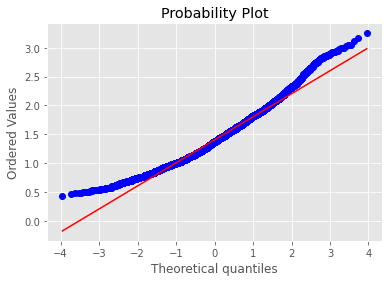

In [22]:
stats.probplot(df['AveragePrice'], dist="norm", plot=plt)
plt.show()

# Непараметрический критерий

### Проверим гипотезу о том, что объем продаж органических авокадо в Чикаго и Детройте совпадает

Используем критерий Манна-Уитни, т.к. распределение отлично от нормального

$ H_0: F_{X_{1}} (x) =  F_{X_{2}} (x) $
    
$ H1: F_{X_{1}} (x) =  F_{X_{2}} (x + ∆),∆ <> 0 $

In [57]:
dataset1_org = data1[(data1.region == 'Chicago')&(data1.type == 'organic')]
dataset2_org = data1[(data1.region == 'Detroit')&(data1.type == 'organic')]

In [58]:
stats.mannwhitneyu(dataset1_org['Total Volume'], dataset2_org['Total Volume'], alternative = 'greater')

MannwhitneyuResult(statistic=25061.0, pvalue=1.7519880017148274e-33)

p < 0.05, отвергаем нулевую гипотезу, объем продаж в Чикаго больше

# Итоги

Было проведено исследование датасета 'Avocado Prices'. Были изучены признаки в датасете, проведена необходимая предобработка данных. После этого я провел визуальный анализ данных. Построены графики средней цены и объема продах обычных и органических авокадо для разных регионов США. Показано, что объем продаж обычных авокадо значительно превосходит объем продаж органических авокадо. Также были выявлены сезонные пики продаж обычных авокадо и моменты резкого ппдения цены на органические авокадо.

Были проверены статистические гипотезы о совпадении цен и объемов продаж авокадо обеих типов в Чикаго и Нью-Йорке, также было проерена гипотеза о равенстве объемов продаж органических авокадо в Чикаго и Детройте, верной была признана альтернативная гипотеза - объем продаж в Чикаго больше.

<img width = '300px' src= https://image.freepik.com/free-vector/cute-avocado-character_92289-1860.jpg>